# Fayette County E-Scooters & Bicycles Data Exploration

This project is devoted to exploring data related to collisions, injuries, and deaths between bicycles and scooters since the beginning of the Fayette County E-Scooter Project in the spring of 2018. Data analysis including charts will be used to explore the datasets provided by the Lexington Fayette County Data and Analysis Department. Note that two separate datasets were compiled and sent from the LFPD. One concerns data entries solely related to 'e-scooter' searches as well as one for 'bicycle' searches. The second database is the comprehensive list of bicycle and e-scooter-related police reports concerning collisions and injuries. 

The LFPD has some notes that should be made clear concerning this data. One, it was impossible to determine "motor-scooters" from "e-scooters". This means that injuries related to e-scooters are roped in with general motor scooters, so it's difficult to determine if they come from commercial brands like Lime/Bird or are private motor scooters. Two, the lat/lng points of collisions have been censored and are triangulated to the nearest intersection. This gives privacy to involved parties and protects their identities. 

In [65]:
import re
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time

In [2]:
# set dataframe to options for row and column widths 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# load data from csv files provided by Lexington-Fayette Police Department 

# first, the narrative searches for 'bicycle' or 'scooter' collisions data
bicycle_collisions_narrative = pd.read_csv('../data/csv/LFPD_data/scooter_narrative_search.csv')
scooter_collisions_narrative = pd.read_csv('../data/csv/LFPD_data/scooter_narrative_search.csv')



In [4]:
# next, the full bicycle and scooter collision data 
bicycles_all_collisions = pd.read_csv('../data/csv/LFPD_data/all_collision_bicycles.csv')
scooters_all_collisions = pd.read_csv('../data/csv/LFPD_data/all_collision_scooters.csv')


In [5]:
# Create DataFrames 
# for scooters
scooter_search = pd.DataFrame(scooter_collisions_narrative)
all_scooter = pd.DataFrame(scooters_all_collisions)

# for bicycles
bicycle_search = pd.DataFrame(bicycle_collisions_narrative)
all_bicycle = pd.DataFrame(bicycles_all_collisions)

## Data Cleanup Pt. 1
### Initial Exploration and DataFrame Manipulation Phase

### All Scooters Data

Let's begin with examining the entire scooters database and look at the data

In [6]:
# print the dfa
all_scooter

,MFN,DATE,TIME,DOW,STR#,DIR,ROADWAY,SUF,MP,LATITUDE,LONGITUDE,INTERSECTION,#UNITS,#VEH#,#KILL,#INJURED,WEATHER,RD\COND,H&R,DIRECTIONAL ANALYSIS,MANNER,RDCHAR,LIGHT COND
0,72361205,6/2/2019,2037,Sunday,NaN,NaN,TATES CREEK,RD,7.312,37.962833,-84.494582,CLEARWATER WAY,2,2,0,1,CLEAR,DRY,False,OTHER INTERSECTION COLLISIONS,REAR END,STRAIGHT & GRADE,DAYLIGHT
1,72365079,6/10/2019,2113,Monday,NaN,NaN,DE ROODE,ST,0.341,38.049801,-84.512039,NaN,2,2,0,0,CLEAR,DRY,False,1 VEHICLE PARKED POSITION (NOT PARKING LOT/DRIVEWAY),REAR END,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON
2,72375575,7/4/2019,1814,Thursday,NaN,NaN,VILLAGE,DR,0.311,38.048873,-84.549215,DEVONPORT DR,2,2,0,1,CLEAR,DRY,True,ANGLE COLLISION - OTHER,ANGLE,STRAIGHT & LEVEL,DAYLIGHT
3,72378150,7/11/2019,1440,Thursday,NaN,NaN,ALEXANDRIA,DR,4.104,38.031740,-84.548859,LANE ALLEN RD,1,1,0,1,CLEAR,DRY,False,OTHER INTERSECTION COLLISIONS,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
4,72383937,7/24/2019,2154,Wednesday,NaN,NaN,CAULDER,RD,0.128,37.978714,-84.482379,HOT SPRINGS CT,2,2,0,1,CLEAR,DRY,False,ANGLE COLLISION - ONE VEHICLE TURNING LEFT,ANGLE,STRAIGHT & GRADE,DARK-HWY LIGHTED/ON
5,72392613,8/13/2019,1248,Tuesday,NaN,NaN,LIBERTY,RD,0.670,38.034993,-84.461202,NaN,1,1,0,1,CLEAR,DRY,False,COLLISION WITH FIXED OBJECT NON - INTERSECTION - FIRST EVENT COLLISION 09 - 32 EXCLUDING 16,SINGLE VEHICLE,STRAIGHT & GRADE,DAYLIGHT
6,72399462,8/28/2019,605,Wednesday,NaN,NaN,SARON,DR,0.009,37.968155,-84.502516,MAN O WAR BLVD,1,1,0,0,CLEAR,WET,False,COLLISION WITH FIXED OBJECT IN INTERSECTION - FIRST EVENT COLLISION 09 - 32,SINGLE VEHICLE,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON
7,72401902,9/3/2019,1016,Tuesday,NaN,NaN,EASTLAND,DR,0.711,38.045986,-84.454248,NEW CIRCLE RD,1,1,0,1,CLEAR,DRY,False,OTHER INTERSECTION COLLISIONS,SINGLE VEHICLE,STRAIGHT & GRADE,DAYLIGHT
8,72408907,9/18/2019,1812,Wednesday,3000.0,NaN,TATES CREEK,RD,9.588,37.993517,-84.495352,NaN,2,2,0,0,CLEAR,DRY,True,COLLISION IN PARKING LOT,REAR END,STRAIGHT & LEVEL,DAYLIGHT
9,72409859,9/20/2019,1700,Friday,NaN,E,LOUDON,AVE,0.512,38.051769,-84.475228,SHROPSHIRE AVE,2,2,0,1,CLEAR,DRY,True,REAR END - ONE VEHICLE TURNING LEFT,REAR END,STRAIGHT & LEVEL,DAYLIGHT


In [7]:
## now let's look at the scooter info including Dtypes, number  
all_scooter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MFN                   94 non-null     int64  
 1   DATE                  94 non-null     object 
 2   TIME                  94 non-null     int64  
 3   DOW                   94 non-null     object 
 4   STR#                  14 non-null     float64
 5   DIR                   22 non-null     object 
 6   ROADWAY               94 non-null     object 
 7   SUF                   84 non-null     object 
 8   MP                    91 non-null     float64
 9   LATITUDE              94 non-null     float64
 10  LONGITUDE             94 non-null     float64
 11  INTERSECTION          39 non-null     object 
 12  #UNITS                94 non-null     int64  
 13  #VEH#                 94 non-null     int64  
 14  #KILL                 94 non-null     int64  
 15  #INJURED              94 

In [8]:
## rename columns to be more friendly 
all_scooter.rename(columns = {'#Units': 'Units', 'RD\COND':'Road_cond', 'H&R':'HitAndRun', 'DOW':'DoW', '#KILL':'Killed', '#INJURED':'Injured', '#VEH#':'Number of Vehicles Involved', 'DIRECTIONAL ANALYSIS':'Direction'}, inplace=True)

In [9]:
# what are the counts of different fields?
all_scooter.HitAndRun.value_counts()

False    69
True     25
Name: HitAndRun, dtype: int64

#### Average number of hit and runs involving motorized scooters for Fayette County

**True (25) / False (69) = 0.3623**

wow! ~36% of scooter injuries are hit and runs. 
That seems a little high, but maybe we should compare this number to other national averages later for this project. 

Next, let's take a look at the weather conditions involved with scooter collisions here in Lexington. Do wet conditions have any effect on the number of collisions?:




In [10]:
# what are the different values/counts for road conditions with scooters?
all_scooter.Road_cond.value_counts()


DRY      85
WET       8
OTHER     1
Name: Road_cond, dtype: int64

Interesting. Most scooter collisions take place during dry road conditions. It seems likely that people do not use scooters in Lexington during rainstorms. :D Or better yet, wet road conditions have little effect on the number of incidents. And why is there one 'other' condition? It's likely debris in the road or some other outlier reason that would affect road conditions. 

Next, I'm going to check against the weather field value counts and see how they correspond with the road conditions.

In [11]:
# Let's go over the weather data field next. See if there is a correlation between weather and wet road conditions
all_scooter.WEATHER.value_counts()

CLEAR      74
CLOUDY     13
RAINING     6
OTHER       1
Name: WEATHER, dtype: int64

Text(0.5, 1.0, '# of Motorized Scooter Collisions by Weather Conditions')

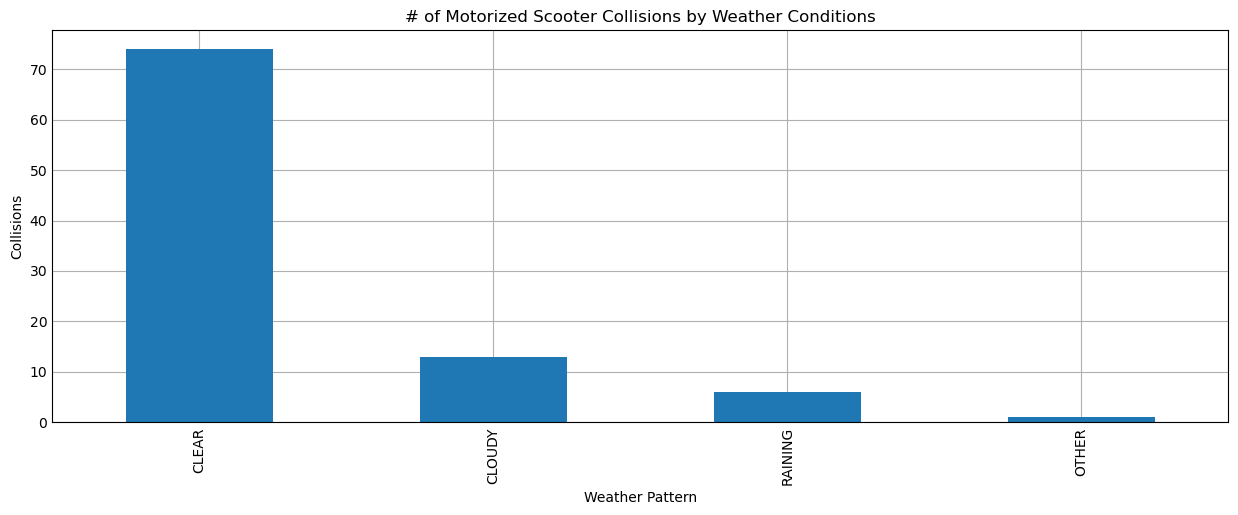

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
all_scooter.WEATHER.value_counts().plot.bar()
ax.set_xlabel('Weather Pattern',)
ax.set_ylabel('Collisions' )
ax.set_title('# of Motorized Scooter Collisions by Weather Conditions')

Looks like the weather patterns correspond roughly to the road conditions. There are 8 wet road condition collisions and that corresponds with the roughly 6 weather conditions described in the police report. We can safely say that weather and road conditions do not showcase any leading causal data to related to the frequency of Lexington's motorized scooter incidents.

But right now, I am more concerned with the injury/death data and would like to move forward with that. Before we finish the analysis, let's remember to convert the csv to a geoDataFrame with Lat/long values as the geometries. 

Next, let's take a look at injuries counts.

In [12]:
# Check the values for number of injuries  
all_scooter.Injured.values

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       1, 0, 0, 0, 1, 1], dtype=int64)

In [13]:
# What are the counts of these numbers?
all_scooter.Injured.value_counts()

1    49
0    39
2     6
Name: Injured, dtype: int64

Looks like there are about ten more single injury-related collisions as non-injury. About 7% of all collisions with motor scooters result in 2 injuries. 

Text(0.5, 1.0, '# of Motorized Scooter Collisions by Day of Week in Lexington, KY')

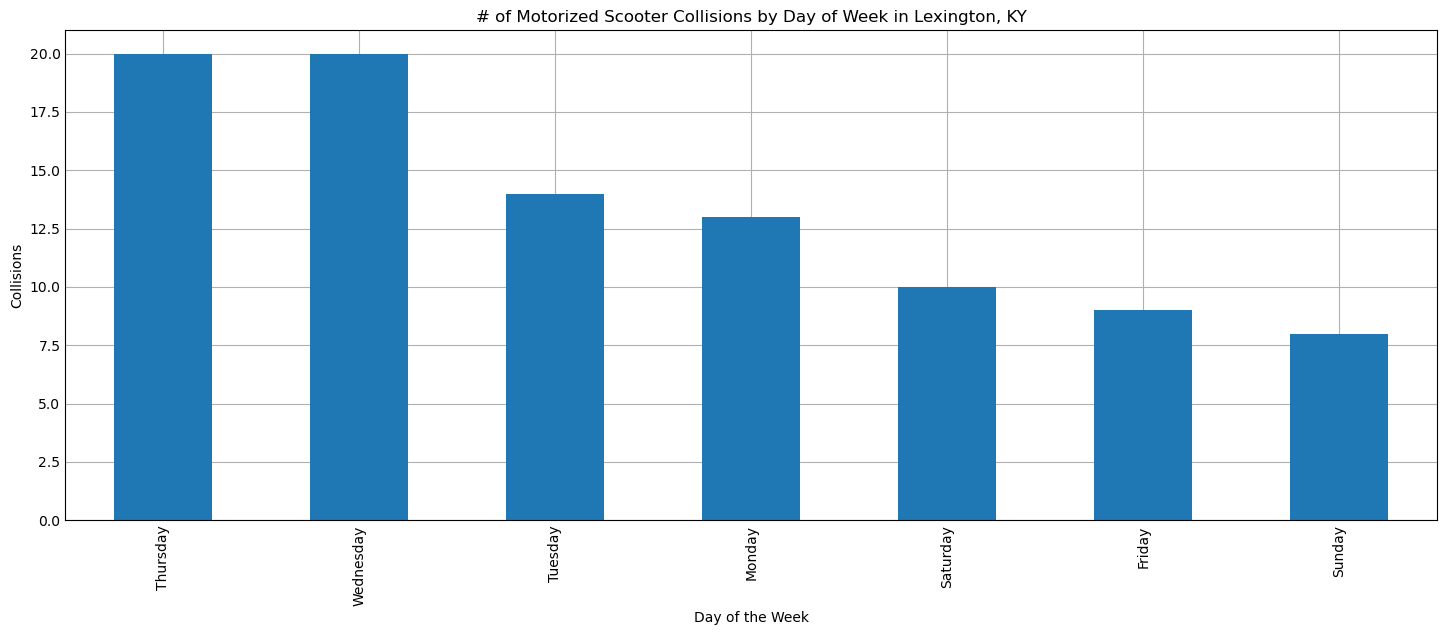

In [37]:
fig, ax = plt.subplots(figsize=(14, 5))
all_scooter.DoW.value_counts().plot.bar()
ax.set_xlabel('Day of the Week',)
ax.set_ylabel('Collisions' )
ax.set_title('# of Motorized Scooter Collisions by Day of Week in Lexington, KY')

Collisions with motorized scooters most frequently take place on Thursday and Wednesday. There are roughly 6-8 more collisions on those days compared to Tuesday and Monday with even less frequency over the weekend. That's surprising because I would have thought weekends had more collision-related incidents due to more people off of work and on the roads. It would be interesting to look into why Wednesdays and Thursdays tend to be more prominent. 

In [38]:
all_scooter.Killed.value_counts()

0    91
1     3
Name: Killed, dtype: int64

In [16]:
# Looks like only three scooter collisions have resulted in death since 2018.

# Only ~3% of collisions result in death here in Lexington

3 / 94

0.031914893617021274

In [17]:
# Next, let's check the roadways and see which ones are the most common 
all_scooter.ROADWAY.values

array(['TATES CREEK', 'DE ROODE', 'VILLAGE', 'ALEXANDRIA', 'CAULDER',
       'LIBERTY', 'SARON', 'EASTLAND', 'TATES CREEK', 'LOUDON',
       'PASADENA', 'TATES CREEK', 'LOWRY', 'PINE', 'WINCHESTER',
       'SUMMITT AT FRITZ FARM', 'VIRGINIA', 'RICHMOND', 'GEORGETOWN',
       'WINCHESTER', 'VERSAILLES', 'VERSAILLES', 'ARMSTRONG MILL',
       'HISLE', 'VERSAILLES', 'SHAFTSBURY', 'VERSAILLES', 'BROADWAY',
       'LEESTOWN', 'CLAY', 'BEAUMONT CENTRE', 'NEW CIRCLE', 'WILLY',
       'CENTRE', 'NEW CIRCLE', 'GOODWIN', 'LOUDON', '7TH', 'EASTLAND',
       'OLD RICHMOND', 'HORSEMANS', 'GEORGETOWN', 'DOUGLAS', 'MAPLE',
       'CITATION', 'WINCHESTER', 'MAIN', 'NICHOLASVILLE', 'VERSAILLES',
       'KINGTREE', '2ND', 'MAIN', 'SHAWNEE', 'TATES CREEK', 'CHINOE',
       'NEW CIRCLE', 'SPRING RUN', 'CORRAL', '3RD', 'TATES CREEK',
       'BROADWAY', 'LIMESTONE', 'BROADWAY', 'RADCLIFFE', 'BROADWAY',
       'LEESTOWN', 'LIMESTONE', 'LANE ALLEN', 'RICHMOND', 'BROADWAY',
       'INDUSTRY', 'BROADWAY', 'LIME

In [18]:
all_scooter['road_counts'] = all_scooter.ROADWAY.value_counts()

Text(0.5, 1.0, '# of Motorized Scooter Collisions by Roadway in Lexington, KY')

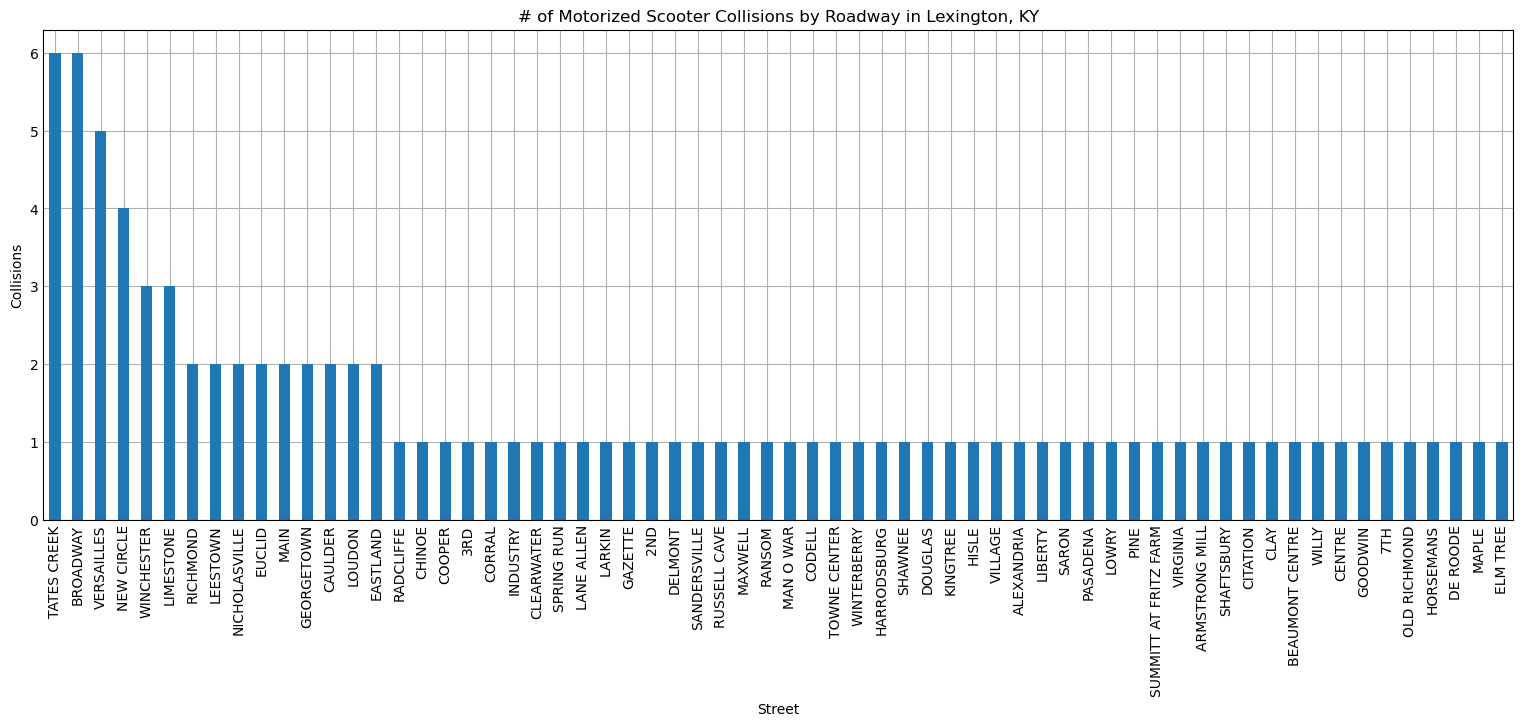

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
all_scooter.ROADWAY.value_counts().plot.bar()
ax.set_xlabel('Street',)
ax.set_ylabel('Collisions' )
ax.set_title('# of Motorized Scooter Collisions by Roadway in Lexington, KY')

The highest amount of collisions take place on Tates Creek, Broadway, Versailles Road, New Circle, Winchester Road respectively. We can come back to this later with a map to interogate locations where collisions take place. Let's move on and look at the months of the year that scooter injuries take place. Our hypothesis is that scooter injuries take place more often during the school season, and UK likely has an affect on the frequency of injuries. Of course, this is just a hypothesis for now, but we should consider this element going forward in studying the age range for collisions involving students and other youthful victims. 

In [43]:
# create a field to store the month values from DATE


In [70]:
# let's take a look at the DATE field
date = str(all_scooter.DATE)

dto = datetime.strptime(date, '%m/%d/%Y %H:%M:%S')

list = [dto.month, dto.day, dto.year]
print(list)


    

ValueError: time data '0       6/2/2019\n1      6/10/2019\n2       7/4/2019\n3      7/11/2019\n4      7/24/2019\n5      8/13/2019\n6      8/28/2019\n7       9/3/2019\n8      9/18/2019\n9      9/20/2019\n10     9/21/2019\n11     9/25/2019\n12     9/30/2019\n13    10/10/2019\n14    10/17/2019\n15    10/22/2019\n16    10/23/2019\n17     11/4/2019\n18     11/8/2019\n19    11/20/2019\n20    11/27/2019\n21    11/28/2019\n22     1/23/2020\n23     3/24/2020\n24     3/25/2020\n25     4/16/2020\n26     4/18/2020\n27      5/4/2020\n28     5/16/2020\n29     5/21/2020\n30     5/28/2020\n31      6/3/2020\n32      6/3/2020\n33      6/4/2020\n34      6/4/2020\n35      6/8/2020\n36     6/11/2020\n37     6/22/2020\n38     7/18/2020\n39      8/5/2020\n40      8/6/2020\n41      9/2/2020\n42      9/2/2020\n43      9/8/2020\n44     10/3/2020\n45     10/8/2020\n46     10/9/2020\n47    10/23/2020\n48    10/28/2020\n49      2/4/2021\n50     3/15/2021\n51     3/17/2021\n52     4/17/2021\n53     4/27/2021\n54      5/2/2021\n55      5/4/2021\n56     5/13/2021\n57     5/18/2021\n58     5/18/2021\n59     5/19/2021\n60     5/31/2021\n61      6/1/2021\n62      6/2/2021\n63      6/5/2021\n64      6/6/2021\n65     7/11/2021\n66     7/28/2021\n67      8/5/2021\n68      8/6/2021\n69      8/8/2021\n70    10/12/2021\n71    10/23/2021\n72     11/4/2021\n73     11/7/2021\n74    11/10/2021\n75    11/16/2021\n76     12/9/2021\n77    12/20/2021\n78     2/28/2022\n79      3/5/2022\n80     3/20/2022\n81     3/24/2022\n82     4/19/2022\n83     4/22/2022\n84      5/2/2022\n85     5/13/2022\n86     5/13/2022\n87     5/20/2022\n88     5/24/2022\n89     5/30/2022\n90     6/12/2022\n91     6/13/2022\n92     6/15/2022\n93     6/25/2022\nName: DATE, dtype: object' does not match format '%m/%d/%Y %H:%M:%S'

## Scooter Narrative Search Database

In [ ]:
# set the index row 1 as header for pandas dataframe column
scooter_collisions_narrative.columns = scooter_collisions_narrative.iloc[0]

# remove the first row that has the old column names 
scooter_collisions_narrative = scooter_collisions_narrative[1:]

# print the df
scooter_collisions_narrative

In [ ]:
## now let's look at the scooter info including Dtypes, number  
scooter_collisions_narrative.info()

# check the dtypes afterwards
scooter_collisions_narrative.dtypes

### All Bicycles Database


In [ ]:
# set the index row 1 as header for pandas dataframe columns
all_bicycle.columns = all_bicycle.iloc[0]

# remove the first row that has the old column names 
all_bicycle = all_bicycle[1:]
# print the dfa
all_bicycle

## Bicycle Narrative Search Database 

In [ ]:
bicycle_collisions_narrative